In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
loan = pd.read_csv("loan.csv", sep = ',', encoding = "ISO-8859-1", low_memory = False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<h3>1. Understanding the Data</h3>

In [5]:
#fetching first 5 rows
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#fetching all the columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


<p>As we saw in the columns of the dataset, the important columns are: </p>
<ul>
<li>interest_Rate</li>
<li>term</li>
<li>loan_amount</li>
<li>grade</li>
<li>sub_grade</li>
<li>annual_income</li>
</ul>
etc..

Here <b>loan_status</b> will be our targeted variable which we will comapre with all independent variables.

<h3>2. Data Cleaning</h3>

<p>Some columns have large number of missing values. Let's check those</p>

In [8]:
#Total missing values in every columns
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
loan.shape #current dataset shape

(39717, 111)

In [10]:
#let's calculate the percentage of missing values from every columns
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


<p>Here, we have many columns having 100% missing values. Let's remove those as they are no longer needed for the data analysis part</p>

In [11]:
#removing columns with more than 90% missing values
#creating column drop_column
drop_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(drop_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [12]:
loan = loan.drop(drop_columns, axis = 1)
loan.shape

(39717, 55)

In [13]:
#finding out missing values again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
#Here we have 2 columns with around 32% and 64% missing values
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


Here, Column desc have the content which user filled pre applying the loan and column 'mths_since_last_delinq' have the data of number of months passed since the person missed the payments. As we cannot use this data as the predictor at the time of loan application.

So we are dropping these both columns

In [15]:
#dropping above 2 columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis = 1)

In [16]:
loan.shape

(39717, 53)

In [17]:
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

<h4>Here Columns looks fine!</h4>
<h4> Let's check whether some rows have missing values or not</h4>

In [18]:
#missing values in rows
loan.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

All looks fine here!

In [19]:
#let's check the column format here.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

Here column int_rate is character (object) type. we have to change it to float


In [20]:
loan['int_rate'] = loan['int_rate'].apply(lambda x:pd.to_numeric(x.split("%")[0]))

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

Now let's extract the numeric part from the variable emp_length. 
Also before doing that, we will drop the missing value of the variable because we will be using regex function to extract the numeric part which will throw an error.

In [22]:
loan = loan[~loan['emp_length'].isnull()]

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null object
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_p

Now we will use the regular expression to extract numeric values from string and then convert them to numeric.

In [24]:
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
#now convert them to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

<h3>3. Data Analysis</h3>

The main objective of the data analysis part is to identify the variables which we will consider for the analysis and use those to predict the approval/rejection of the loan. 

we categorized the data into 3 different type:

<ul>
<li>Applicant details (Applicant age, employement details etc)
<li>Loan details (Interest rate, Loan amount, interest rate etc)
<li>Loan repayment (Next payment data, pending balance etc)
</ul>


3rd category can only be collected post loan approval, so at the time of application we will no use this category. we will move ahead with 1st and 2nd category.

In [26]:
#dropping 3rd category variables

loan_repayment = ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util",
                 "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt","total_pymnt_inv", "total_rec_prncp", "total_rec_int",
                 "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", 
                  "last_credit_pull_d",
                 "application_type"]

In [27]:
loan_repayment

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [28]:
#dropping loan_repayment from the dataset
df = loan.drop(loan_repayment, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

Also we can't use the variable zip code, state, address. And the variable 'title' is extracted from ghe variable 'purpose'

In [29]:
df = df.drop(['title', 'url', 'addr_state', 'zip_code'], axis = 1)

Now let's have a target variable 'loan_status' and categorized them.

In [30]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

Here we can see that we have most of the category as 'Fully Paid'.
'Current' means the loan is neither paid nor defaulted. Also lets indicate 1 as person has defaulted and 0 otherwise.

In [31]:
df = df[df['loan_status'] != 'Current'] 
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
#converting loan_status to nuneric
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

#displaying count
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

Here 1 being person as defaulted and 0 otherwise

Let's start the univariate analysis

<h3> 4. Univariate Analysis </h3>


Here we have unordered, ordered and Quantitative variables <br>
<ul>
<li>Unordered : home_ownership, purpose, verification_status, addr_state
<li>ordered : term, loan_status, Grade, issue_year, issue_month
<li>Quantitative variables: int_rate, dti, loan_amnt, annual_inc
</ul>

In [32]:
#let's consider the overall default rate from the 'loan_status'
round(np.mean(df['loan_status']), 2)

0.14

Here the overall default rate is 14%.

Now let make a plot and visualize the default rate across categorical variable.

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


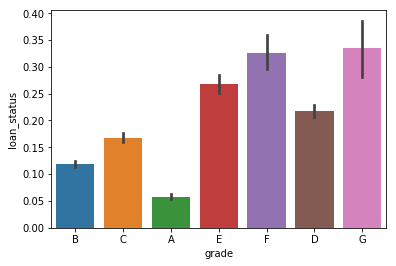

In [33]:
#Here we will plotting default rates across grade of loans
sns.barplot(x = 'grade', y = 'loan_status', data = df)
plt.show()

As grade increases from A to G, the default rate increases. 

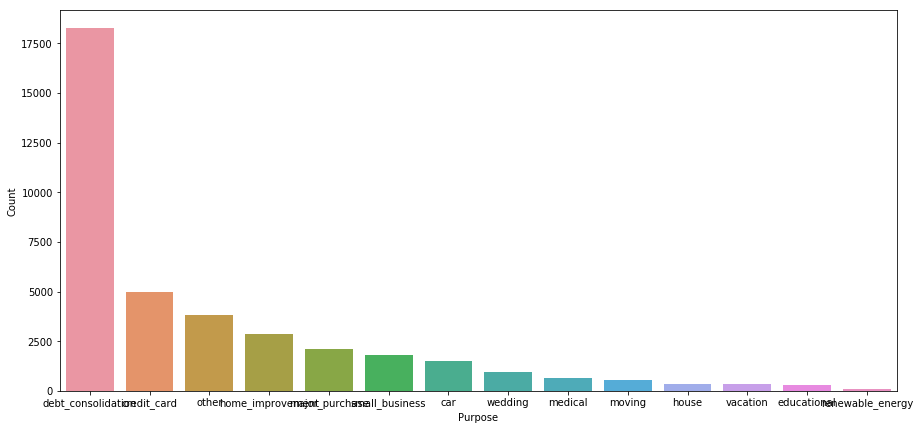

In [34]:
#count plot for Purpose
plt.figure(figsize = (15,7))
fig = sns.countplot(loan.purpose.dropna(), order = loan.purpose.value_counts().index)
fig.set(xlabel = 'Purpose', ylabel = 'Count')
plt.show()

Creating function plot_cat to plot loan_status across categorical variable

In [35]:
def plot_cat(cat_var):
    sns.barplot(x = cat_var, y = 'loan_status', data = df)
    plt.show()

comparing default rates across grade of loan

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


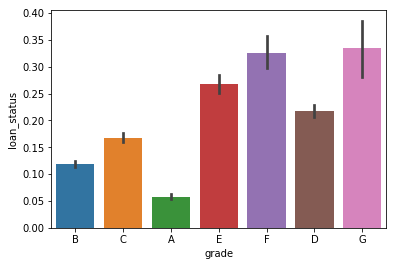

In [36]:
plot_cat('grade')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


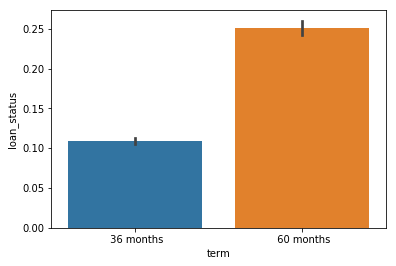

In [37]:
plot_cat('term')

Here we can see, 60 months loan default is greater than 36 month loan default

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


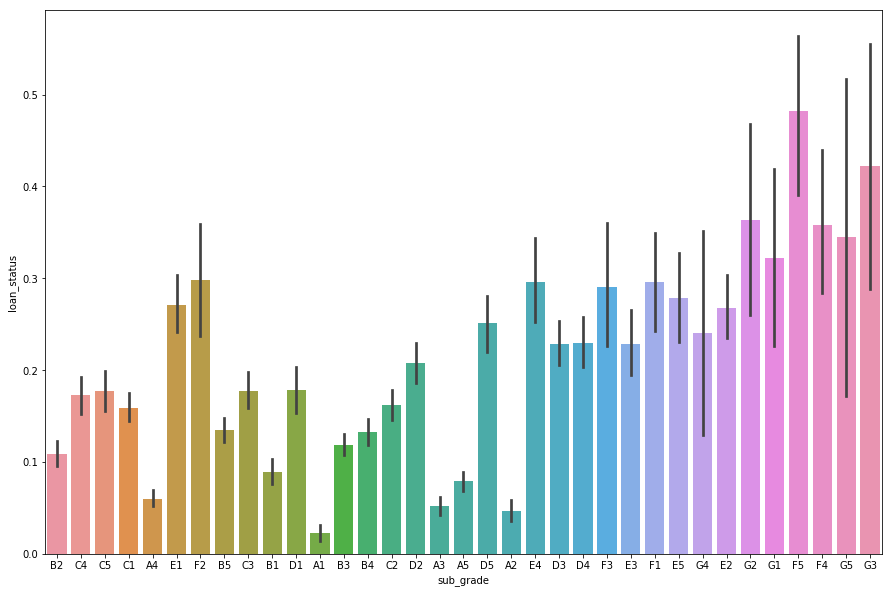

In [38]:
#plotting sub_grade across loan_status
plt.figure(figsize = (15,10))
plot_cat('sub_grade')

Here A1 is better than A2 and A2 is better than A3

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


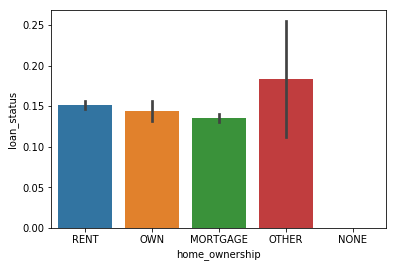

In [39]:
#plotting home ownership
plot_cat('home_ownership')

[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

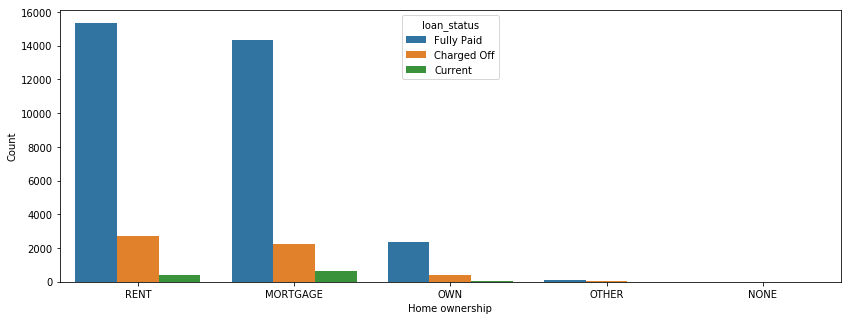

In [40]:
#count plot for home ownership
plt.figure(figsize = (14,5))
fig = sns.countplot(loan.home_ownership.dropna(), order = loan.home_ownership.value_counts().index, hue = loan.loan_status)
fig.set(xlabel = 'Home ownership', ylabel = 'Count')

Here we can see that the majority of the applicants resides in a rented home or an mortage.

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


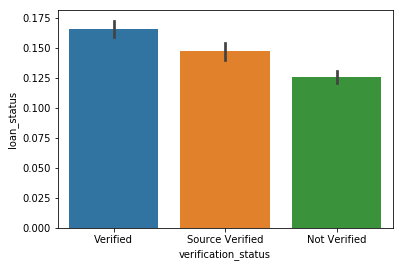

In [41]:
#plotting across verification_status
plot_cat('verification_status')

Here we can see that the verified loan defaults is more than the not verified.

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


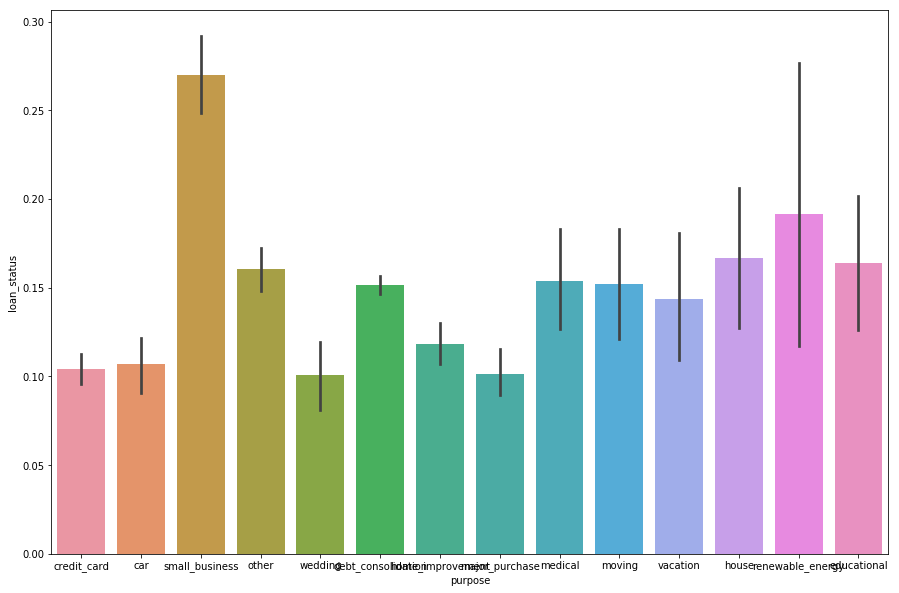

In [42]:
#plotting across purpose
plt.figure(figsize = (15,10))
plot_cat('purpose')

Here we can see that the small_business loans default the most, as compare to education and renewable energy.


Let's see the distribution of the loan across the year. first convert the year column into datetime and then extracts the year and month from it.

In [43]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [44]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [45]:
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [46]:
#checking number of loans granted across the year and number of loans granted across the months
df.groupby('year').year.count()


year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [47]:
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Here we can see that the most loans are granted after mid of the year with december as maximum.

Now let's plot those with clear understanding

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


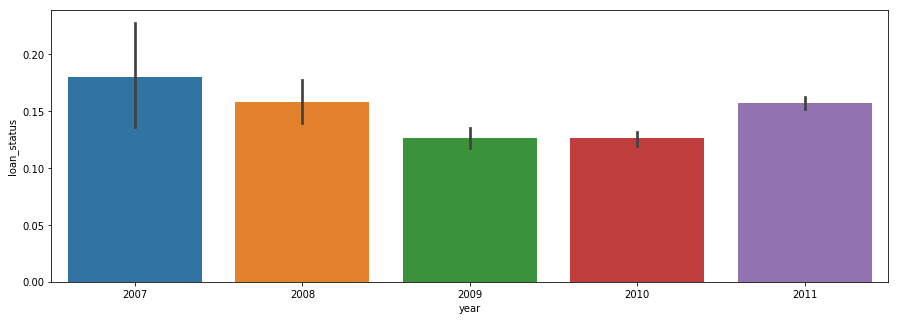

In [48]:
plt.figure(figsize = (15,5))
plot_cat('year')

Here we can see that the default rate decrease from 2008 till 2010 and suddenly increased in 2011.

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


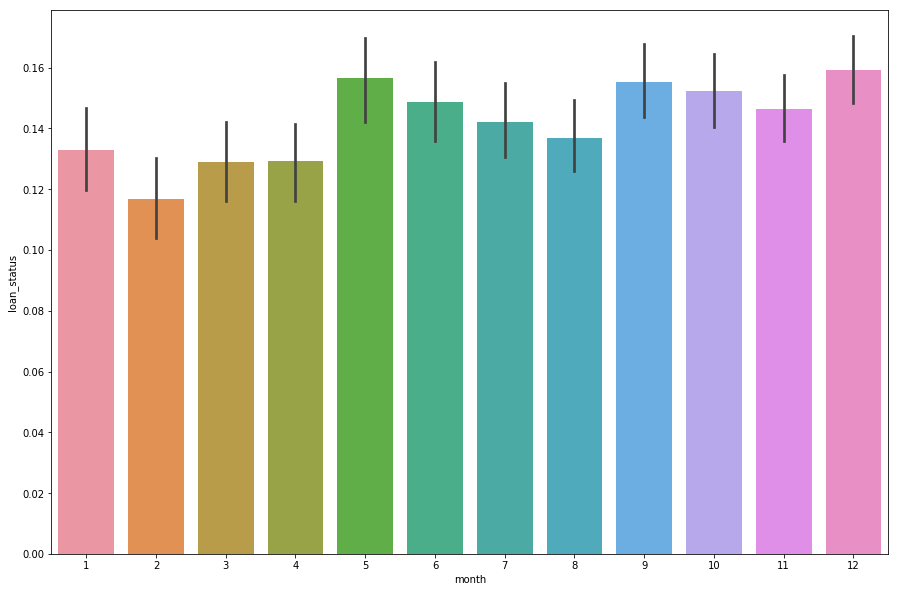

In [49]:
plt.figure(figsize = (15,10))
plot_cat('month')

Not much variations across months.

Now plotting how default rate varies among continous variables.

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


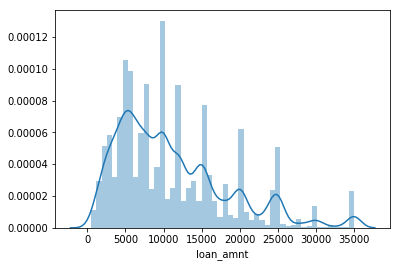

In [50]:
sns.distplot(df['loan_amnt'])
plt.show()

Here we can see the median loan_amnt is 10000.

Now let's categorize the variable into categories and compare the default rate using plots.
we are categorizing the variable into small (<5000), medium(5000, 15000), high (15000, 25000) and very high(>25000)

In [51]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    if n >=5000 and n<=15000:
        return 'medium'
    if n >=15000 and n <=25000:
        return 'high'
    else:
        return 'very high'
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [52]:
df['loan_amnt'].value_counts()

medium       21962
low           7095
high          7075
very high     1412
Name: loan_amnt, dtype: int64

now comparing default rate with loan_amnt type

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


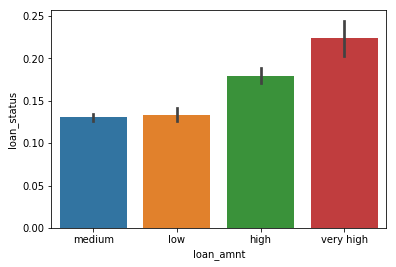

In [53]:
plot_cat('loan_amnt')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Count'), Text(0.5,0,'loan amount')]

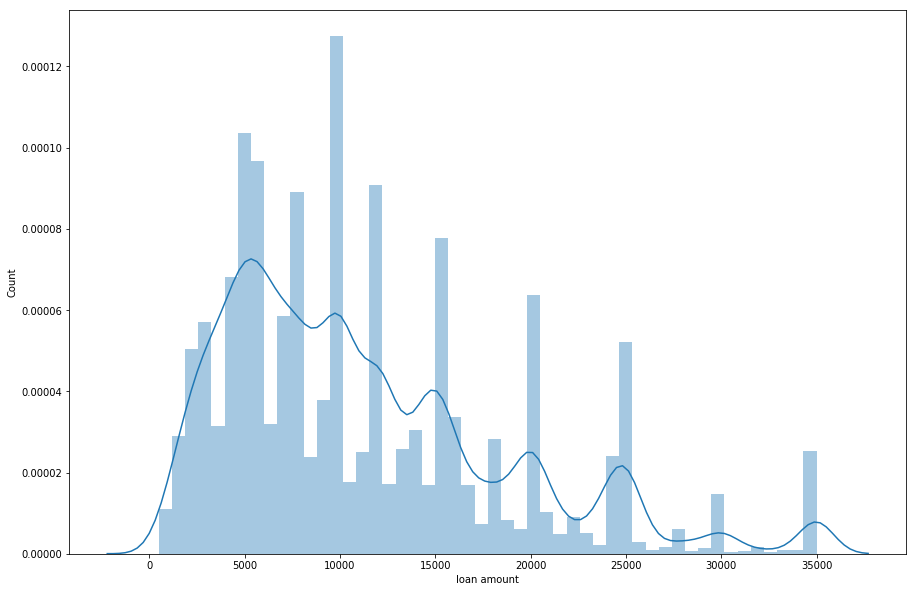

In [54]:
plt.figure(figsize = (15,10))
fig = sns.distplot(loan['loan_amnt'])
fig.set(xlabel = 'loan amount', ylabel = 'Count')

Here we can see that the majority of loan amount are between 5000 to 20,000.

Also converting funded_amnt_inv to same categories adn plotting them across loan_status

In [55]:
df['funded_amnt_inv'] = df['funded_amnt_inv'] .apply(lambda x: loan_amount(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


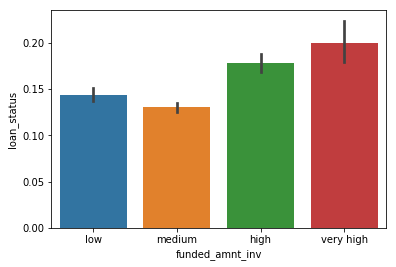

In [56]:
plot_cat('funded_amnt_inv')

Now converting interest rate to low, medium, high category

In [57]:
def int_rate(n):
    if n <=10:
        return 'low'
    elif n >=10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


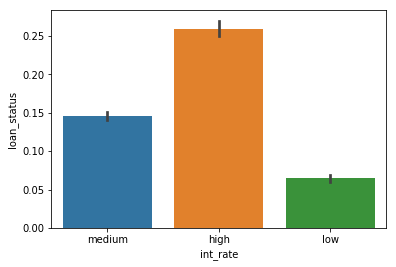

In [58]:
#plotting default rate across interest rate
plot_cat('int_rate')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Count'), Text(0.5,0,'Interest Rate')]

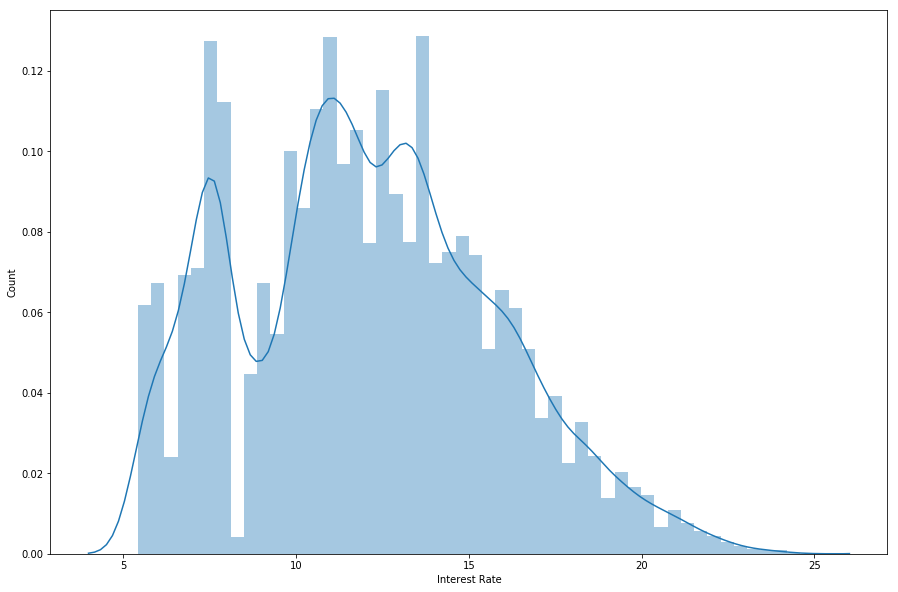

In [59]:
#plotting distribution plot
plt.figure(figsize = (15,10))
fig = sns.distplot(loan['int_rate'])
fig.set(xlabel = 'Interest Rate', ylabel = 'Count')

Here we can see, High interest rate default the most.
Also maximum of the loans are between 7 to 9 percent or between 12 to 16 percent

Now analysing debt to income ratio

In [60]:
def dti(n):
    if n <=10:
        return 'low'
    elif n >10 and n <=20:
        return 'medium'
    else:
        return 'high'
df['dti'] = df['dti'].apply(lambda x: dti(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


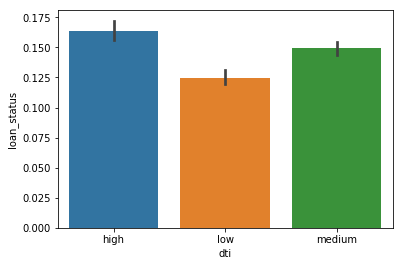

In [61]:
plot_cat('dti')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'count'), Text(0.5,0,'dti')]

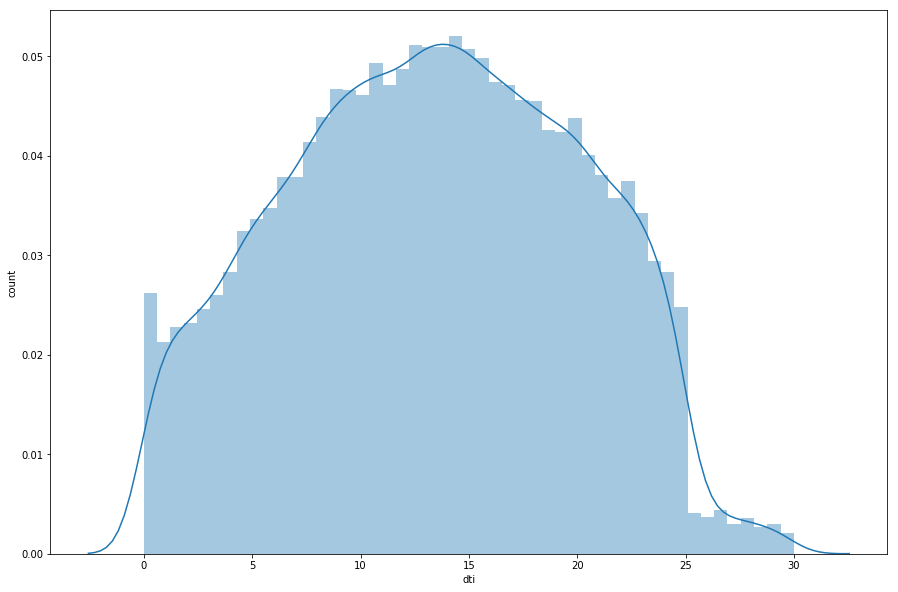

In [62]:
#plotting distribution plot for dti
plt.figure(figsize = (15,10))
fig = sns.distplot(loan['dti'])
fig.set(xlabel = 'dti', ylabel = 'count')

Here we analyzed that higher the dti, higher the default rate which was as expected.

Now same with funded_amnt

In [63]:
def funded_amount(n):
    if n <=5000:
        return 'low'
    elif n>5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


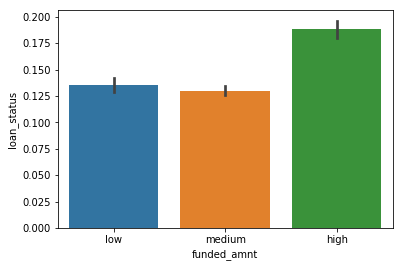

In [64]:
#plotting across loan_status
plot_cat('funded_amnt')

Doing same analysis across installment

In [65]:
def installment(n):
    if n <=200:
        return 'low'
    elif n >200 and n <=400:
        return 'medium'
    elif n >400 and n <=600:
        return 'high'
    else:
        return 'very high'
df['installment'] = df['installment'].apply(lambda x: installment(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


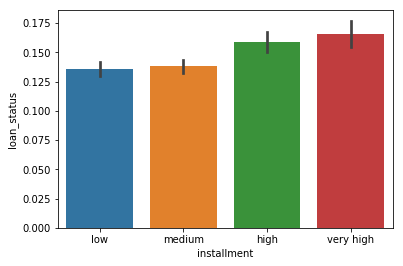

In [66]:
plot_cat('installment')

As we can see here, the higher the installment higher will be the default rate.

Doing same analysis across emp_length

In [67]:
#let's first drop the missing values from emp_length
df = df[~df['emp_length'].isnull()]

def emp_length(n):
    if n <=1 :
        return 'fresher'
    elif n > 1 and n <= 3:
        return 'Junior'
    elif n >3 and n <= 7:
        return 'Senior'
    else:
        return 'Expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


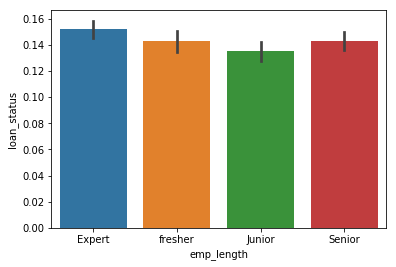

In [68]:
plot_cat('emp_length')

Here expert has the highest default rate and fresher and senior have almost same default rate.

Now let's do the same with annual income

In [69]:
def annual_income(n):
    if n <=50000 :
        return 'low'
    elif n  > 50000 and n <= 100000:
        return 'medium'
    elif n >100000 and n <=1500000:
        return 'high'
    else:
        return 'very high'
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


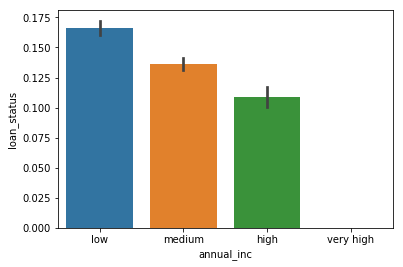

In [70]:
#plotting across annual income
plot_cat('annual_inc')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Count'), Text(0.5,0,'Annual Income')]

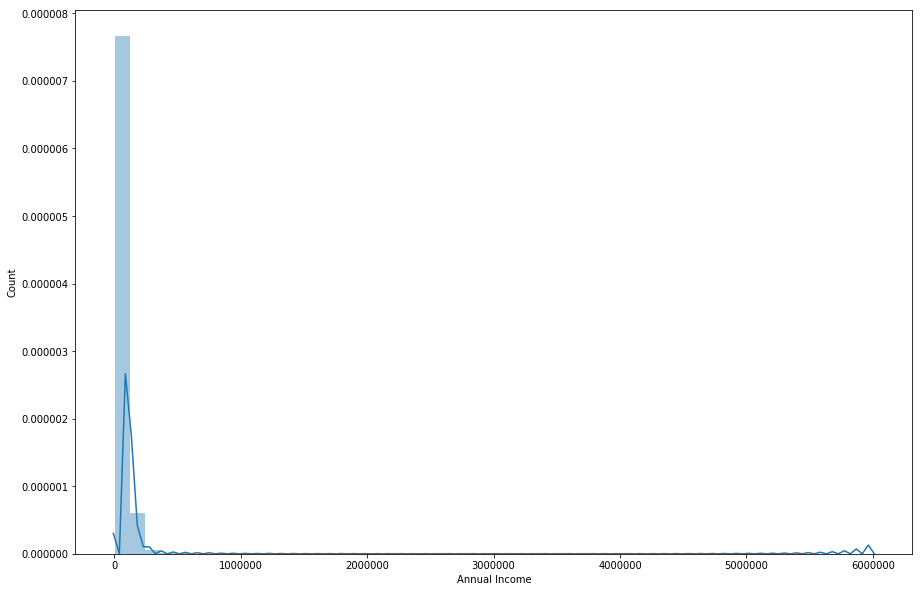

In [71]:
#plotting distribution plot for annual income
plt.figure(figsize = (15,10))
fig = sns.distplot(loan['annual_inc'])
fig.set(xlabel = 'Annual Income', ylabel = 'Count')

In [72]:
#Above we have outlier in annual income column which need to be expecuted.
loan['annual_inc'].describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Here we can see that the max value is 6000000 which is way above than the mean value so it needs to be removed.


Also, we can clearly see that the lower the annual income, higher the default rate.

In [73]:
final = loan['annual_inc'].quantile(0.995)
loan = loan[loan['annual_inc'] < final]
loan['annual_inc'].describe()

count     38422.000000
mean      66977.958050
std       37415.970687
min        4000.000000
25%       41004.000000
50%       60000.000000
75%       82404.000000
max      294000.000000
Name: annual_inc, dtype: float64

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Count'), Text(0.5,0,'Annual Income')]

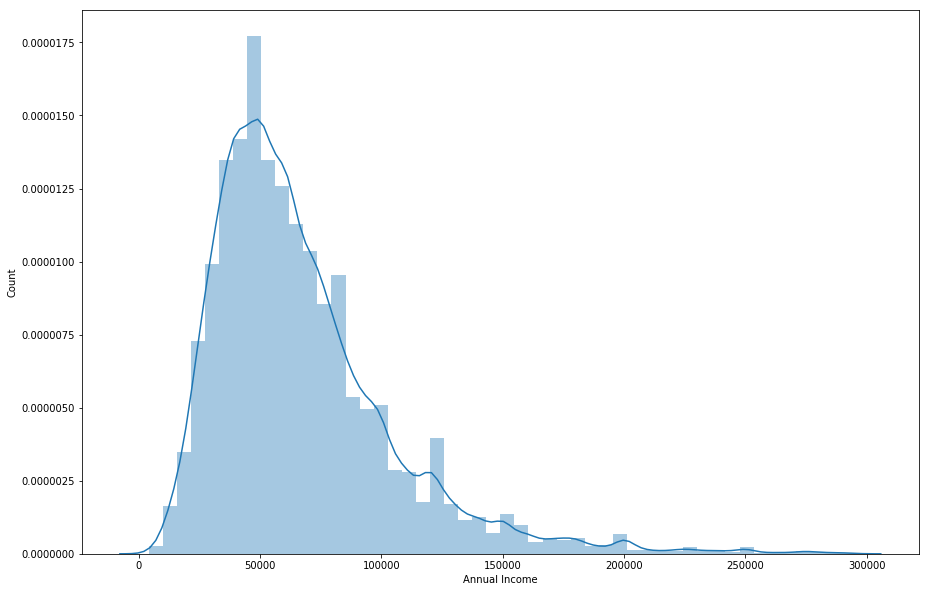

In [74]:
#again plotting distplot
plt.figure(figsize = (15,10))
fig = sns.distplot(loan['annual_inc'])
fig.set(xlabel = 'Annual Income', ylabel = 'Count')

Here we can clearly see that the majority have an annual income between 5000 and 100000

<h3>Univariate Conclusions </h3>

<ul>
<li>1) Most of the loans are taken to consolidate debts from the other loans.
<li>2) Most of the loans are taken in 2011
<li>3) Around 70% of the loan are of the tenure of 36 months
<li>4) The most prevalent interest rate are between 12 to 16 percent
<li>5) Majority of the applicants stays in rents or mortage house
<li>6) Large number of applicants have the annual income between 500000 to 1000000 
</ul>


<h3>4. Segmented Univariate Analysis </h3> <br>

We have compared the default rates across various variables and we found that the some of the important predictors are purpose of the loan, interest rate, annual income, grades etc. <br>

Let's focus on 4 types of loan based on purpose : <br> <br>
Debt consolidaton <br>
Credit card <br>
Home improvement <br>
Major purchase

In [75]:
objective = ['credit_card', 'debt_consolidation', 'home_improvement', 'major_purchase']
df1 = df[df['purpose'].isin(objective)]
df1['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

Let's now compare the default rates across two types of categorical variables

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


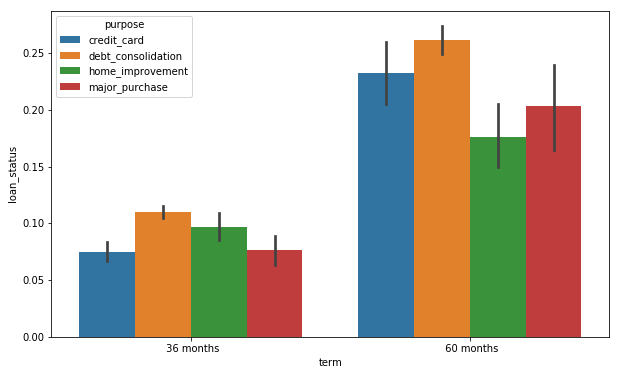

In [76]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'term', y = 'loan_status', hue = 'purpose', data = df1)
plt.show()

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


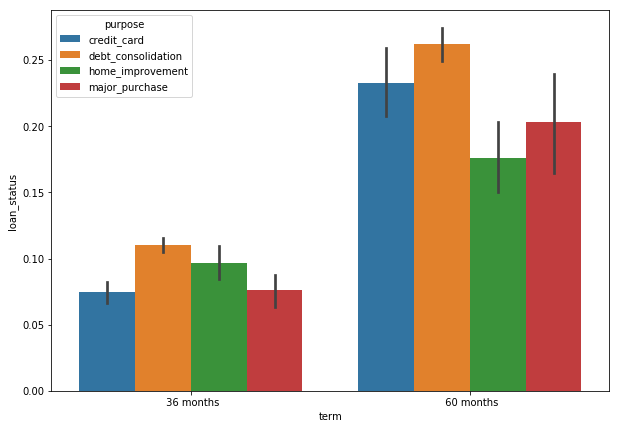

In [77]:
#creating function which takes categorical variables 
def segmented(var): 
    plt.figure(figsize = (10,7))
    sns.barplot( x = var, y = 'loan_status', hue = 'purpose', data = df1)
    plt.show()
segmented('term')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


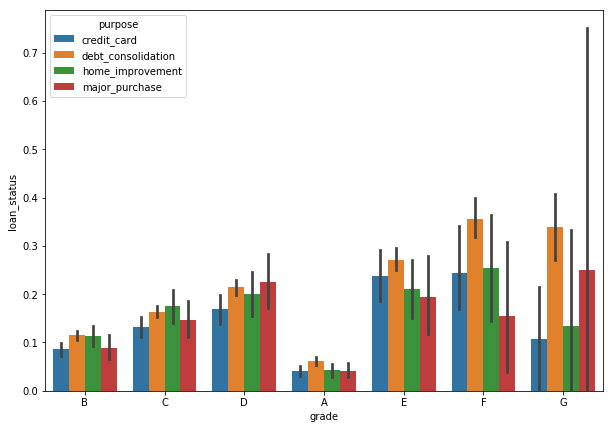

In [78]:
#grade
segmented('grade')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


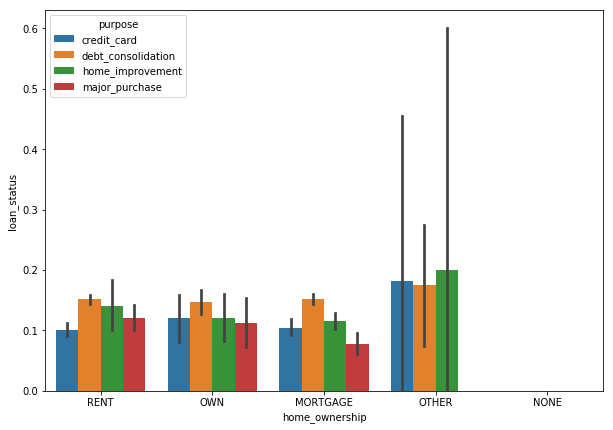

In [79]:
segmented('home_ownership')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


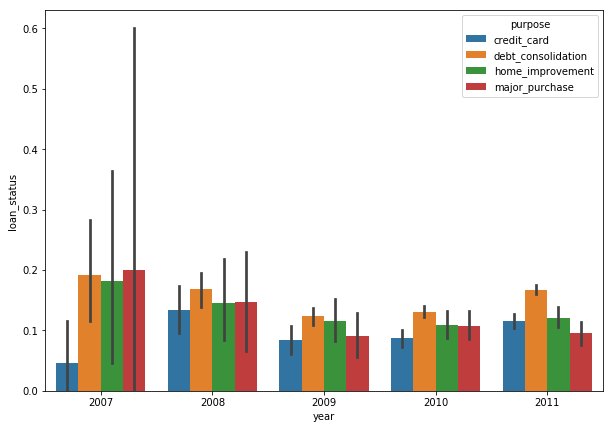

In [80]:
#year
segmented('year')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


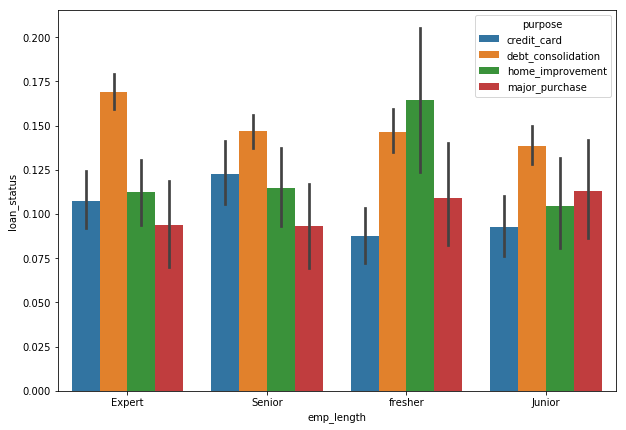

In [81]:
#emp_length
segmented('emp_length')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


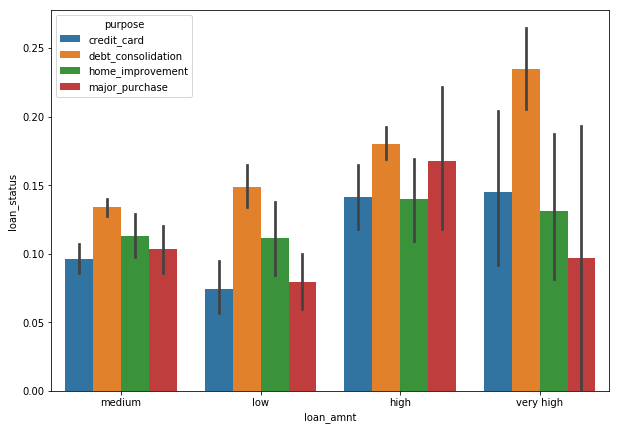

In [82]:
#loan_amnt
segmented('loan_amnt')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


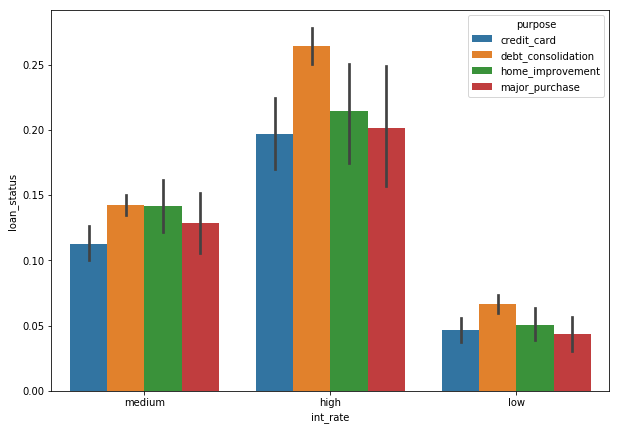

In [83]:
#int_rate
segmented('int_rate')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


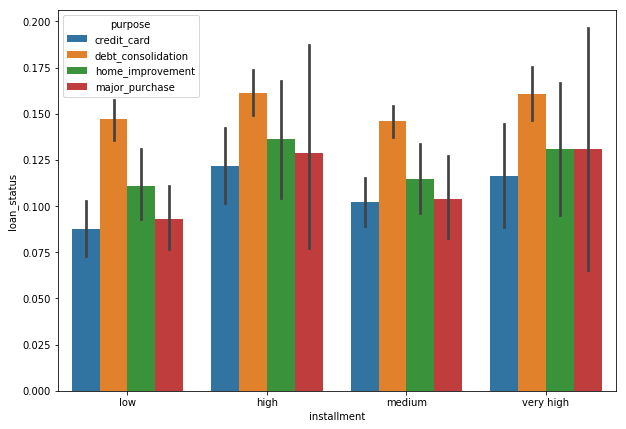

In [84]:
#installment
segmented('installment')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


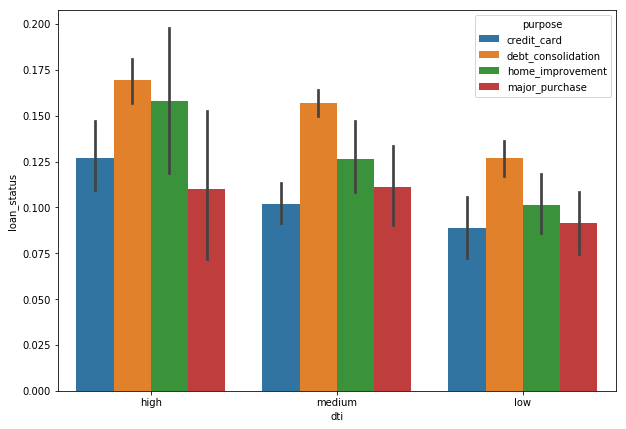

In [85]:
#dti
segmented('dti')

C:\Anaconda_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


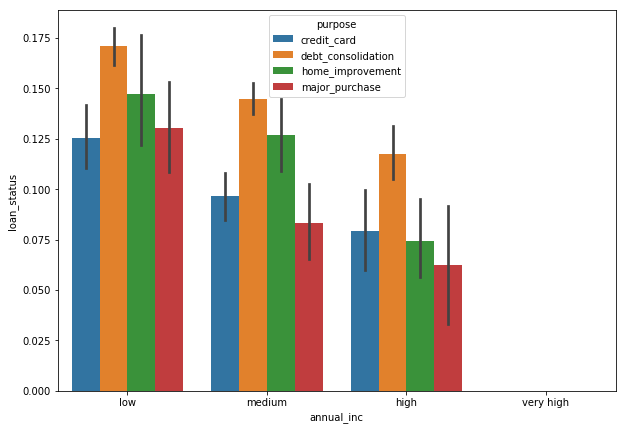

In [86]:
#annual income
segmented('annual_inc')

Here we saw clearly how does the default rate vary across the all categorical variables <br>

Let's see the variation of default rate accross annual income

In [87]:
df1.groupby('annual_inc').loan_status.mean().sort_values(ascending = False)

annual_inc
low          0.157966
medium       0.130075
high         0.098890
very high    0.000000
Name: loan_status, dtype: float64

<h3> 5. Bivariate Analysis </h3>

In [88]:
loans1 = loan

In [89]:
alpha = list(loans1.columns)

Removing categorical variables from alpha to plot corelation matrix of numerical variables

In [90]:
alpha.remove('id')
alpha.remove('member_id')

alpha.remove('term')
alpha.remove('grade')

alpha.remove('sub_grade')

alpha.remove('emp_title')

alpha.remove('emp_length')
alpha.remove('home_ownership')
alpha.remove('verification_status')
alpha.remove('issue_d')
alpha.remove('purpose')
alpha.remove('title')
alpha.remove('addr_state')
alpha.remove('earliest_cr_line')
alpha.remove('out_prncp')
alpha.remove('out_prncp_inv')
alpha.remove('total_rec_late_fee')
alpha.remove('recoveries')
alpha.remove('collection_recovery_fee')
alpha.remove('last_pymnt_d')
alpha.remove('last_credit_pull_d')
alpha.remove('pub_rec_bankruptcies')








<h3> Correlation analysis for all numerical variables <h3>

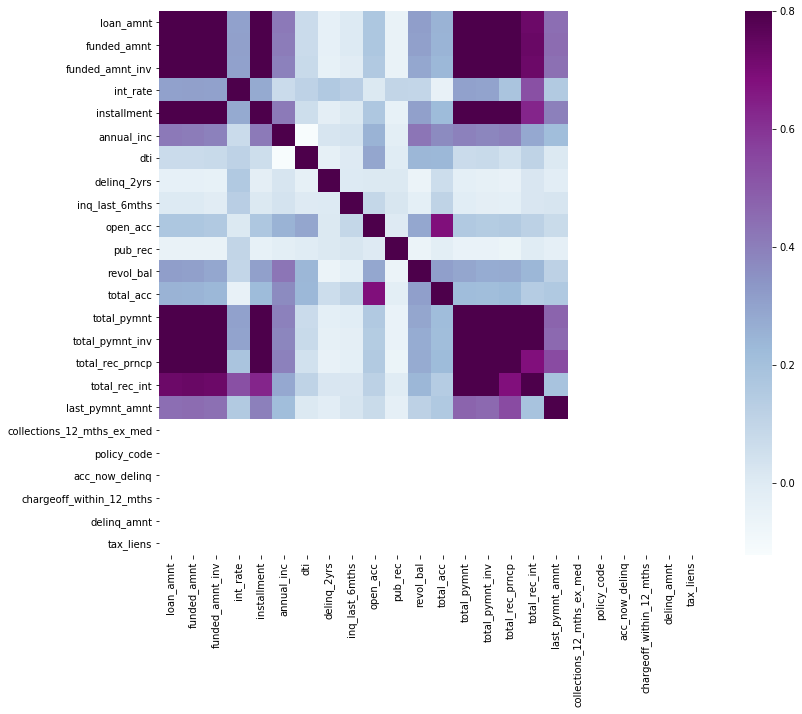

In [91]:
matrix = loans1[alpha].corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu");

Here we can see from the correlation plot that: loan_amnt, funded amount inv, total payment inv, total rec prncp all are highly corelated .